# Simulation code (only know # of turns)


In [1]:
from simulations import basic_simulation
from sellers import RandomSeller
from sellers import DescentArithmeticSeller
imp_list = [i / 10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
rounds = 10000
init_offer=range_max

# random agent
random_results = []
seller = RandomSeller(value=value, init_offer=init_offer)
for imp_incr in imp_list:
  result = basic_simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  random_results.append(result)

# simple heuristic agent, consistently performs better than random
arithmetic_results = []
n = int((init_offer-value)/2)
seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
for imp_incr in imp_list:
  result = basic_simulation(value,
                        range_min,
                        range_max,
                        imp_incr = imp_incr,
                        imp_init = 0,
                        rounds = rounds,
                        seller=seller)
  arithmetic_results.append(result)

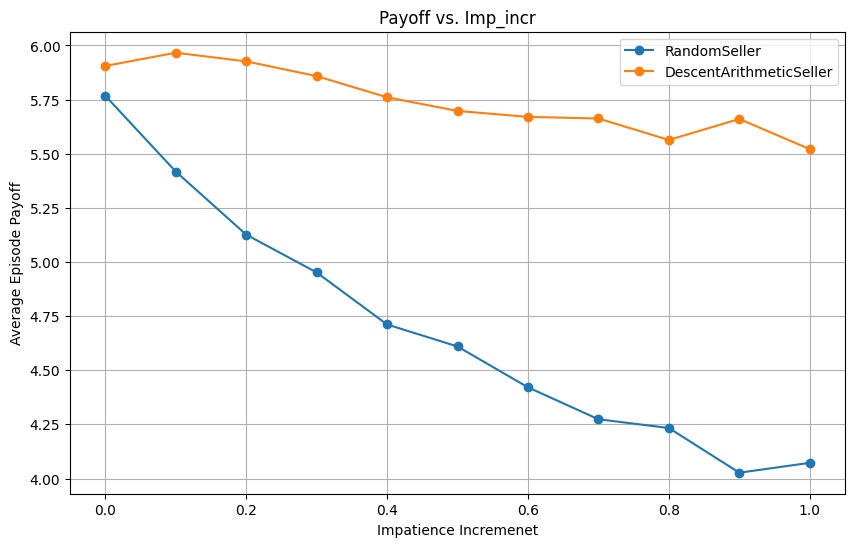

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(imp_list, random_results, marker='o', label=f'RandomSeller')
plt.plot(imp_list, arithmetic_results, marker='o', label=f'DescentArithmeticSeller')
plt.title('Payoff vs. Imp_incr')
plt.xlabel('Impatience Incremenet')
plt.ylabel('Average Episode Payoff')
plt.grid()

plt.legend()  # This will create a legend using the labels specified in the plot functions

plt.show()

In [3]:
from simulations import *
imp_list = [i / 10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
rounds = 10000
init_offer=range_max

# random agent
seller = RandomSeller(value=value, init_offer=init_offer)
random_results = random_imp_simulation(value,
                        range_min,
                        range_max,
                        rounds = rounds,
                        seller=seller)

# simple heuristic agent, consistently performs better than random
n = int((init_offer-value)/2)
seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
arithmetic_results = random_imp_simulation(value,
                        range_min,
                        range_max,
                        rounds = rounds,
                        seller=seller)

In [4]:
# random agent random impatience results
random_results

4.136

In [5]:
# arithmetic agent random impatience result
arithmetic_results

5.8663

In [6]:
mean_list = [i/10.0 for i in range(11)]
all_results = []

# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
rounds = 100000
init_offer=range_max

# random agent
random_results = []
seller = RandomSeller(value=value, init_offer=init_offer)
for mean in mean_list:
  result = normal_imp_simulation(value,
                        range_min,
                        range_max,
                        mean = mean,
                        rounds = rounds,
                        seller=seller)
  random_results.append(result)

# simple heuristic agent, consistently performs better than random
arithmetic_results = []
n = int((init_offer-value)/2)
seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
for mean in mean_list:
  result = normal_imp_simulation(value,
                        range_min,
                        range_max,
                        mean = mean,
                        rounds = rounds,
                        seller=seller)
  arithmetic_results.append(result)

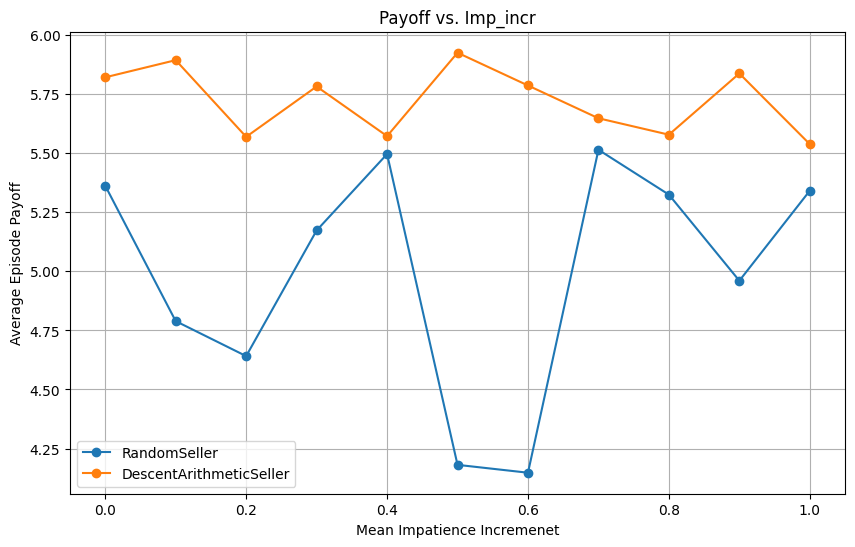

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mean_list, random_results, marker='o', label=f'RandomSeller')
plt.plot(mean_list, arithmetic_results, marker='o', label=f'DescentArithmeticSeller')
plt.title('Payoff vs. Imp_incr')
plt.xlabel('Mean Impatience Incremenet')
plt.ylabel('Average Episode Payoff')
plt.grid()

plt.legend()  # This will create a legend using the labels specified in the plot functions

plt.show()

# Two sellers

In [ ]:
from sellers import *
from buyer import Buyer
from episode import Episode

In [ ]:
#parallel selling
# params that are needed to initialize seller
value = 10
range_min = 11
range_max = 30
init_offer = range_max

n = int((init_offer-value)/2)

seller1 = RandomSeller(value=value, init_offer=init_offer)
seller2 = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
seller1_total_profit = 0
seller2_total_profit = 0
rounds = 5
for i in range(rounds):
  imp_init = 0
  imp_incr = random.choice([i / 10.0 for i in range(11)])
  maxprice = int(random.uniform(range_min, range_max+1))
  buyer = Buyer(maxprice, imp_init, imp_incr)
  episode1 = Episode(buyer, seller1, verbose=True)
  episode2 = Episode(buyer, seller2, verbose=True)
  print("RandomSeller")
  seller1_profit = episode1.run_episode()
  print("HeuristicSeller")
  seller2_profit = episode2.run_episode()
  print("\n")
  seller1_total_profit += seller1_profit
  seller2_total_profit += seller2_total_profit

RandomSeller
Curr state: {'last-offer': 30, 'offers-made': 0}
Seller made offer of 18. The buyer decided to accept offer
Deal made at 18
Buyer's max_price was 30
HeuristicSeller
Curr state: {'last-offer': 30, 'offers-made': 0}
Seller made offer of 20. The buyer decided to accept offer
Deal made at 20
Buyer's max_price was 30


RandomSeller
Curr state: {'last-offer': 30, 'offers-made': 0}
Seller made offer of 17. The buyer decided to accept offer
Deal made at 17
Buyer's max_price was 22
HeuristicSeller
Curr state: {'last-offer': 30, 'offers-made': 0}
Seller made offer of 20. The buyer decided to accept offer
Deal made at 20
Buyer's max_price was 22


RandomSeller
Curr state: {'last-offer': 30, 'offers-made': 0}
Seller made offer of 13. The buyer decided to reject but continue
Curr state: {'last-offer': 13, 'offers-made': 1}
Seller made offer of 12. The buyer decided to walk away
No deal made - no profit.
Buyer's max_price was 12
HeuristicSeller
Curr state: {'last-offer': 30, 'offers-mad

In [ ]:
import random

class EducatedBuyer(object):
    def __init__(self, max_price, imp_incr):
        self.max_price = max_price
        self.imp = 0
        self.imp_incr = imp_incr

    def check_all_offers(self, offers):
        decisions = [] # saves decision for each offer
        accept_indices = [] # saves indices of accepted offers
        accept_values = [] # saves values of accepted offers

        random_number = random.uniform(0, 1)
        if random_number <= self.imp:
            for i in range(len(offers)):
                decisions.append("walk away")
        else:
            for i, offer in enumerate(offers):
                if offer <= self.max_price:
                    decisions.append("accept offer")
                    accept_indices.append(i)
                    accept_values.append(offer)
                else:
                    decisions.append("reject but continue")

        # if more than one offer is accepted
        # NEED OT CHANGE REJECT BUT CONTINUE TO COMPETITOR WON OUT IF THERE ARE ANY ACCEPTS AT ALL
        if len(accept_indices) > 0:
            min_value = min(accept_values)
            min_indices = [i for i, value in zip(accept_indices, accept_values) if value == min_value]

            if len(min_indices) > 1:
                # randomly choose an offer to accept if there are multiple offers with the minimum value
                accept_index = random.choice(min_indices)
            else:
                # if there is a unique minimum, accept it
                accept_index = min_indices[0]
            for idx in range(len(decisions)):
              if idx == accept_index:
                decisions[idx] = "accept offer"
              else:
                decisions[idx] = "competitor won"

        self.imp += self.imp_incr
        return decisions


In [ ]:
edubuyer = EducatedBuyer(15, 0.2)
edubuyer.check_all_offers([11,20])

['accept offer', 'competitor won']

In [ ]:
def two_seller_negotiation(edubuyer, sellers):
  # assume 2 sellers
  terminate = False
  while not terminate:
    offers = [seller.make_offer() for seller in sellers]
    decisions = edubuyer.check_all_offers(offers)
    terminate = ("walk away" in decisions or "accept offer" in decisions)
    # this kind of a junky way to code it 
    # but it works for now
    for i, seller in enumerate(sellers):
      new_state = {"last-offer":offers[i],
                  "comp-last-offer":(offers[:i] + offers[i+1:])[0],
                  "offers-made":seller.state["offers-made"]+1}
      seller.state = new_state
  # get reward for the agents if terminated
  profits = [None for i in range(len(sellers))]
  for i, seller in enumerate(sellers):
    if decisions[i] == "accept offer":
      profits[i]=seller.state["last-offer"]-seller.value
    elif decisions[i] == "walk away":
      profits[i]=0
    elif decisions[i] == "competitor won":
      profits[i]=0
  return profits


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def show_histogram(mean, stdev):
  num_samples = 1000
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  plt.hist(samples, bins=20, density=True)
  plt.show()

def sample_one_point(mean, stdev):
  num_samples = 1
  samples_float = np.random.normal(mean, stdev, num_samples)
  samples = np.round(samples_float).astype(int)
  return samples[0]

In [ ]:
class RandomSeller(Seller):
  def make_offer(self):
    offer = int(random.uniform(self.value+1, self.state["last-offer"])) # return random offer
    return offer

class DescentArithmeticSeller(Seller):
  def __init__(self, value, init_offer, init_descent):
    super().__init__(value, init_offer)
    self.init_descent = init_descent
    self.descent = init_descent
  def make_offer(self):
    offer = self.state["last-offer"]-max(self.descent,1)
    self.descent = self.descent-1
    if offer<self.value+1:
      return self.value+1
    else:
      return offer
  def reset_state(self):
    super().reset_state()
    self.descent = self.init_descent

In [ ]:
# buyer distrubution
mean = 15
stdev = 3
#show_histogram(mean, stdev)
value = 10
rounds = 10000
imp_incr = 0.1

init_offer = mean+4*stdev
n = int((range_max-value)/2)
random_seller = RandomSeller(value=value, init_offer=range_max)
heuristic_seller = DescentArithmeticSeller(value=value, init_offer=init_offer, init_descent = n)
sellers = [random_seller, heuristic_seller]


total_profits = [0 for i in range(len(sellers))]

for i in range(rounds):
  maxprice = sample_one_point(mean,stdev)
  edubuyer = EducatedBuyer(maxprice, imp_incr)
  profits = two_seller_negotiation(edubuyer, sellers)
  for i in range(len(total_profits)):
    total_profits[i] += profits[i]
print(total_profits)

[4665, 4623]
